In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('car_price_prediction.csv')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<Axes: >

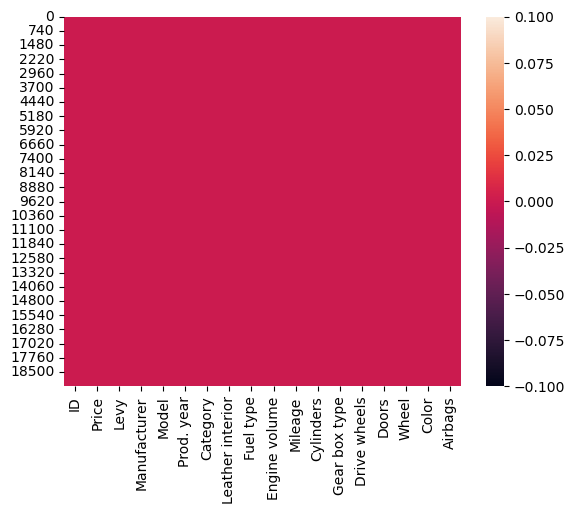

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


C:\Users\putri\AppData\Local\Temp\ipykernel_16404\3629252972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

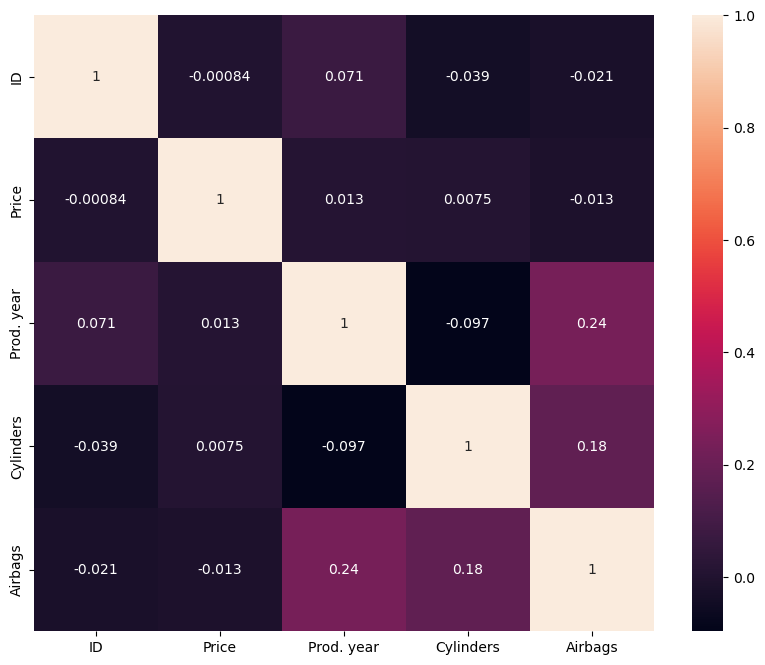

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [9]:
Models = df.groupby('Model').count()[['Prod. year']].sort_values(by='Prod. year', ascending=True).reset_index()
Models = Models.rename(columns={'Prod. year':'numberOfCars'})

(array([   0,    1,    2, ..., 1587, 1588, 1589]),
 [Text(0, 0, 'E 200 w210'),
  Text(1, 0, 'Smart Fortwo'),
  Text(2, 0, 'Skyline GT250'),
  Text(3, 0, 'Feroza'),
  Text(4, 0, 'Skyline 4WD'),
  Text(5, 0, 'Fiesta 1.6'),
  Text(6, 0, 'Fiesta SE'),
  Text(7, 0, 'Sirion'),
  Text(8, 0, 'Focus Flexfuel'),
  Text(9, 0, 'Focus Fokusi'),
  Text(10, 0, 'Silvia'),
  Text(11, 0, 'Focus SEL'),
  Text(12, 0, 'Focus ST'),
  Text(13, 0, 'Sierra DIZEL'),
  Text(14, 0, 'FJ Cruiser'),
  Text(15, 0, 'Sierra'),
  Text(16, 0, 'Forester 4x4'),
  Text(17, 0, 'Forester CrossSport'),
  Text(18, 0, 'Forester L.L.BEAN'),
  Text(19, 0, 'Forester SH'),
  Text(20, 0, 'Forester XT'),
  Text(21, 0, 'Forester cross sport'),
  Text(22, 0, 'Forester stb'),
  Text(23, 0, 'Fred HIBRIDI'),
  Text(24, 0, 'Serena Serea'),
  Text(25, 0, 'Frontera'),
  Text(26, 0, 'Frontera A B'),
  Text(27, 0, 'Seicento fiat 600'),
  Text(28, 0, 'Sebring'),
  Text(29, 0, 'Sienta LE'),
  Text(30, 0, 'Scorpio'),
  Text(31, 0, 'FIT fit'),
  Te

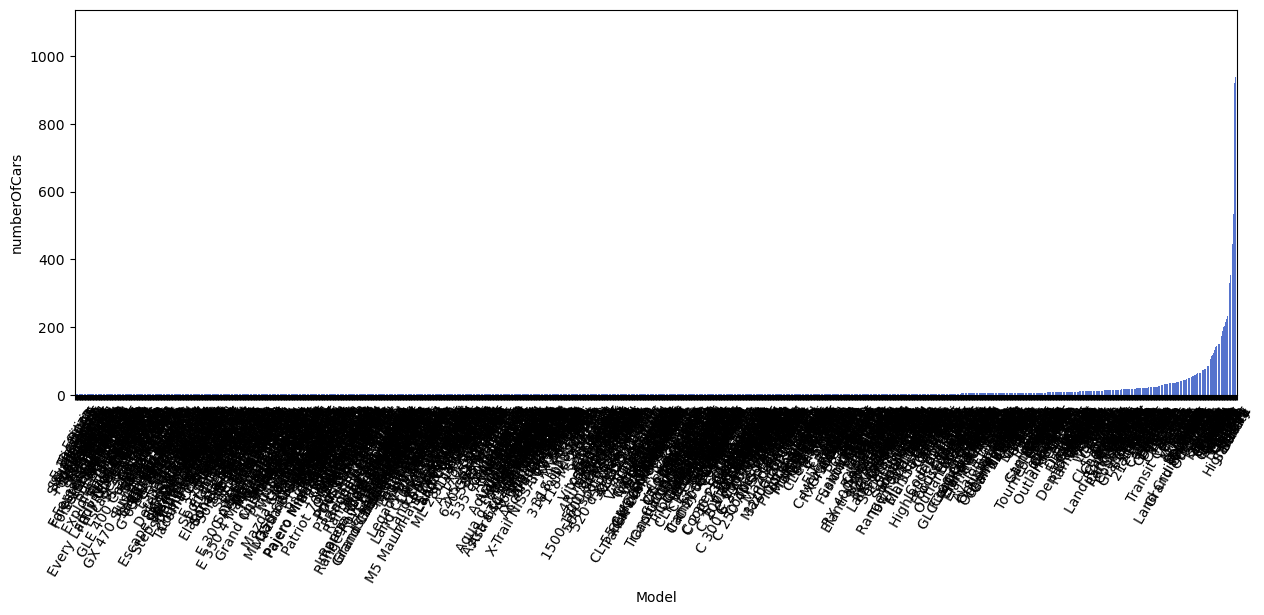

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Models['Model'], y=Models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [11]:
Cylinders = df.groupby('Cylinders').count()[['Prod. year']].sort_values(by='Prod. year').reset_index()
Cylinders = Cylinders.rename(columns={'Prod. year':'count'})

<Axes: xlabel='Cylinders', ylabel='count'>

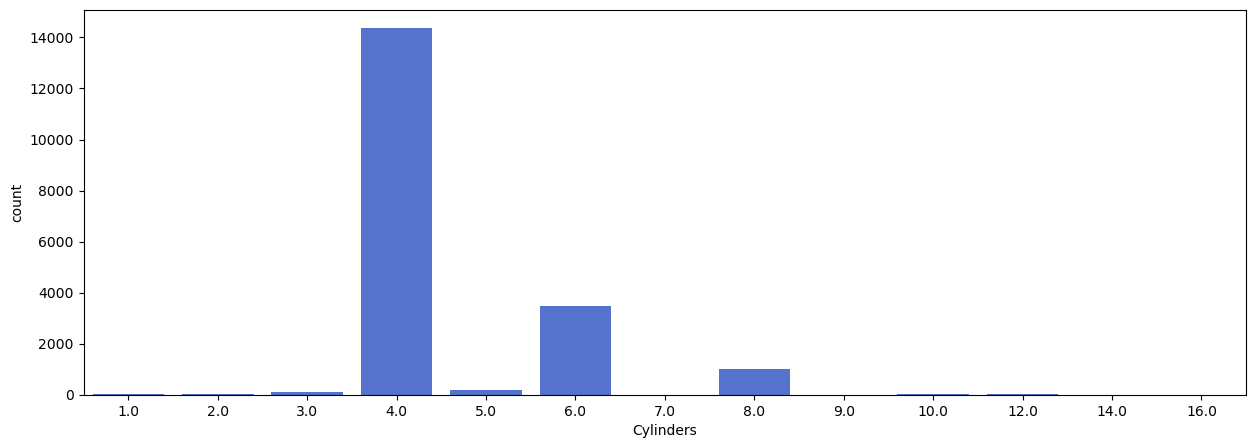

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=Cylinders['Cylinders'], y=Cylinders['count'], color='royalblue')

C:\Users\putri\AppData\Local\Temp\ipykernel_16404\4022771755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Airbags'])


<Axes: xlabel='Airbags', ylabel='Density'>

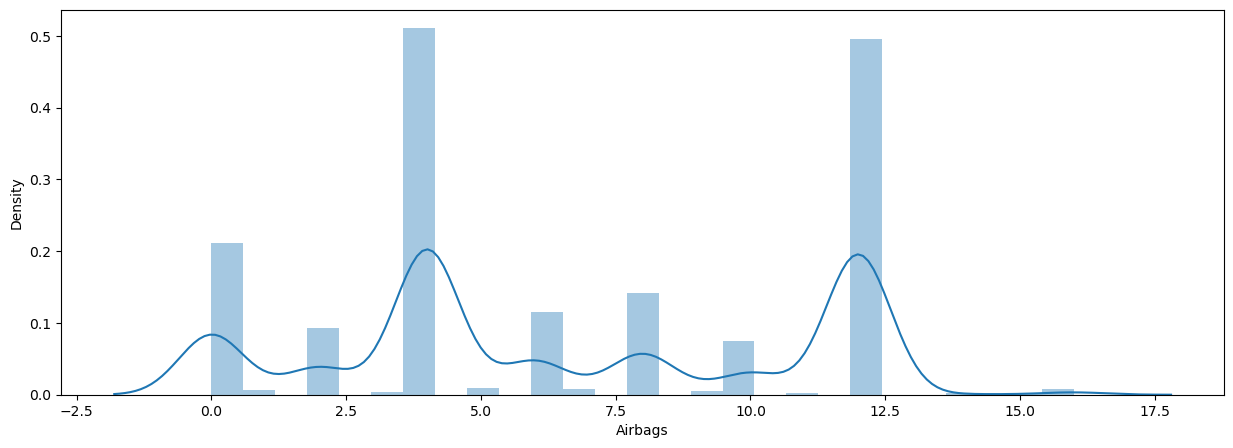

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['Airbags'])

C:\Users\putri\AppData\Local\Temp\ipykernel_16404\1954555324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

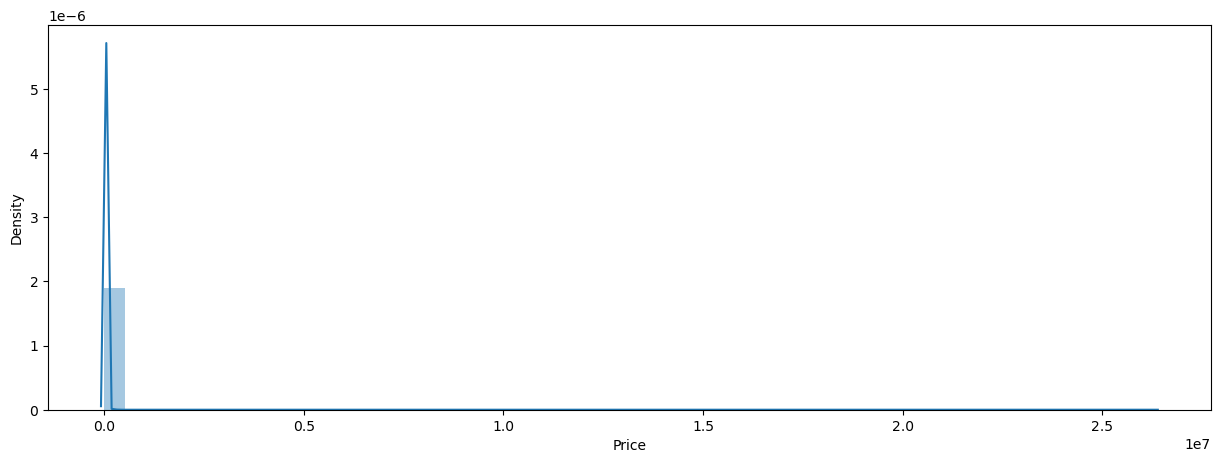

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

In [15]:
features = ['ID', 'Prod. year', 'Cylinders', 'Airbags']
x = df[features]
y = df['Price']
x.shape, y.shape

((19237, 4), (19237,))

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(4810,)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [18]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.03783775131178824


In [19]:
#ID=45797221, Prod. year=2014, Cylinders=6, Airbags=12
input_data = np.array([[45797221, 2014, 6, 12]])

prediction = lr.predict(input_data)
print('estimasi harga mobil :', prediction)

estimasi harga mobil : [18177.64301399]


c:\Users\putri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pickle

filename = 'estimasihargamobil.sav'
pickle.dump(lr, open(filename, 'wb'))